## Probability and Statistics for Machine Learning

In [135]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, binom, poisson, skew, kurtosis, t, ttest_1samp, ttest_ind, ttest_rel, chi2_contingency, f_oneway
import pandas as pd
import seaborn as sns

### Basic Probability Concepts
- Sample Space: The set of all possible outcomes of a random experiment
- Event: A subset of the sample space
### Conditional Probability
- The probability of an event A occuring given that B has occured
### Independence
- Two events **A** and **B** are independent if P(A intersection B) = P(A)P(B)

In [82]:
from itertools import product

# Sample space pf a dice roll
sample_space = list(range(1, 7))

# Probability of rolling an even number
even_numbers = [2,4,6]
P_even = len(even_numbers) / len(sample_space)
P_even

0.5

### Random variables
- Maps outcomes of a random experiment to numerical values
- Types: Discrete|Continuous
- Discrete: takes a countable number of values. Ex. number of heads in 3 coin toses.
- Continuous: takes values from a continuous range. Ex. height and weight
#### Probability Mass Function (PMF)
- Probability distribution of a discrete random variable
#### Probability Density Function (PDF)
- Probability distribution of a continuous random variable

### Expectation, Variance and Standart Deviation
#### Expectation
- **Expectation E[X]:** Weighted average of a random variable2s possible values
- = sum_of_sample_space(x * P(X = x)) Discrete
- = integral_from_-inf_to_infinity(x * f(x)) Continuous
#### Variance
- Measures the spread of a random variable
- VAr[X] = E[(X - E[X])**2]
#### Standart Deviation
- = sqrt(Var[X])

In [83]:
# Random Variable dice roll
outcomes = np.array([1,2,3,4,5,6])
probabilities = np.array([1/6] * 6)

# Expectation
expectation = np.sum(outcomes * probabilities)

# Variance
variance = np.sum((outcomes - expectation)**2 * probabilities)

# Standart Deviation
std_dev = np.sqrt(variance)
std_dev

np.float64(1.707825127659933)

In [84]:
# Example 1: Rolling a dice 10000 times
rolls = np.random.randint(1, 7, size=10000)

# Calculating Probabilities
P_even = np.sum(rolls % 2 == 0) / len(rolls)
P_greater_than_4 = np.sum(rolls > 4) / len(rolls)
P_greater_than_4

np.float64(0.3346)

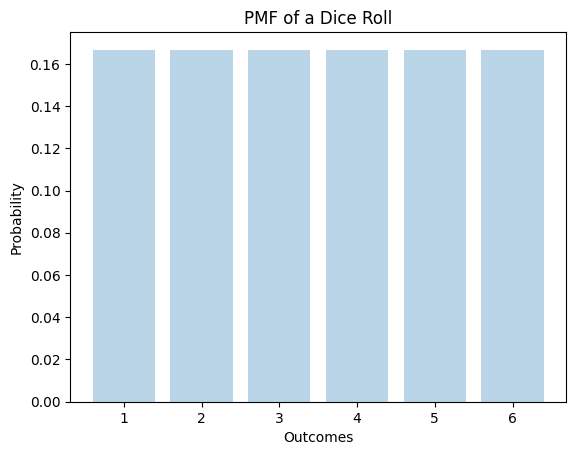

In [85]:
# Example 2: Creating and analyzing Random Variables
# 2.1 Discrete random variable: Dice roll
plt.bar(outcomes, probabilities, alpha=0.3)
plt.title("PMF of a Dice Roll")
plt.xlabel("Outcomes")
plt.ylabel("Probability")
plt.show()

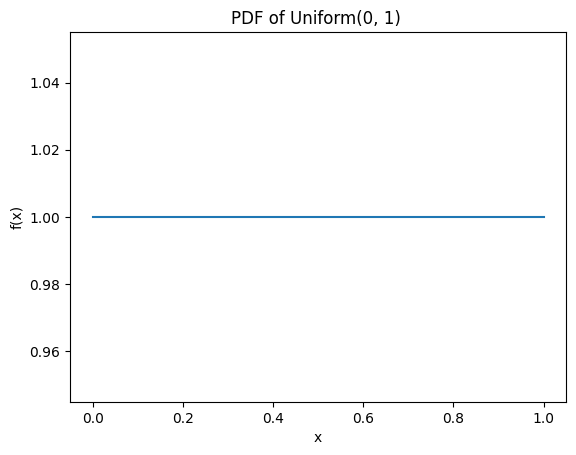

In [86]:
# 2.2 Continuous random variable: Uniform Distribution
x = np.linspace(0, 1, 100)
pdf = uniform.pdf(x, loc=0, scale=1)
plt.plot(x, pdf,)
plt.title("PDF of Uniform(0, 1) ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

### Common Probability Distributions
#### Gaussian (Normal) Distribution
- Symmetric about the mean
- Mean, median, and mode are the same
- Application in ML: Common assumption in many algorithms (e.g., Naive Bayes and Gaussian Mixture Models)
- Assumed in statistical tests
#### Binomial Distribution
- Models the number of successes in n independent Bernoulli trials
- Probability Mass Function (PMF): P(X = k) = Combination(n, k) * p**k * (1 - p)**(n - k)
- Discrete Distribution
- Application in ML: Logistic regression assumes a binomial distribution for binary classification, also other binary classification models use it.
#### Poisson Distribution
- Models the number of events in a fixed interval
- Probability Mass Function (PMF): P(X = k) = lambda * exp(-lambda)/k!
- lambda: average rate of occurence
- Application in ML: Used in event modeling, applied in modeling count data ex. customer arrivals?.
#### Uniform Distribution
- Equal probability for all outcomes in a range
- Probability Density Function (PDF) = f(x) = 1 / (b - a), x element [a, b]
- Continuous distribution
- Application in ML: Random initialization of weights in neural netwroks
- Commonly used in random sampling and initializing parameters

### Visualizing Distributions and Understanding Their Properties
- Visualization helps understand skewness, kurtosis, and outliers
- Skewness: Measure of symmetry: Positive skew (Tail on the right) | Negative skew (Tail on the left)
- Kurtosis: Measure of the "tailedness" of the distribuiton: High Kurtosis (POsitive kurtosis, leptokurtic) (more outliers) | Low Kurtosis (Negative kurtosis, platykurtic) (fewer outliers)

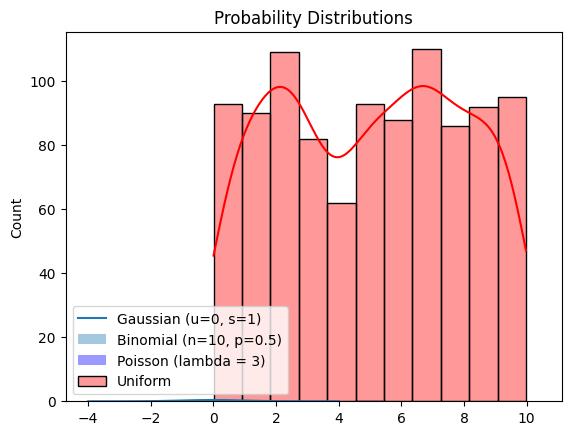

In [108]:
#Gaussian Distribution
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1), label="Gaussian (u=0, s=1)")

# Binomial Distribution
n, p = 10, 0.5
x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x,n,p), alpha=0.4, label="Binomial (n=10, p=0.5)")

# Poisson Distribution
lam = 3
x = np.arange(0,10)
plt.bar(x, poisson.pmf(x, lam), alpha=0.4, label="Poisson (lambda = 3)", color="blue")

# Uniform Distribution
x = np.random.uniform(low=0, high=10, size=1000)
sns.histplot(x, kde=True, label="Uniform", color="red", alpha=0.4)

plt.title("Probability Distributions")
plt.legend()
plt.show()

Skewness:  0.3117530585022963
Kurtosis:  -0.5735679489249765


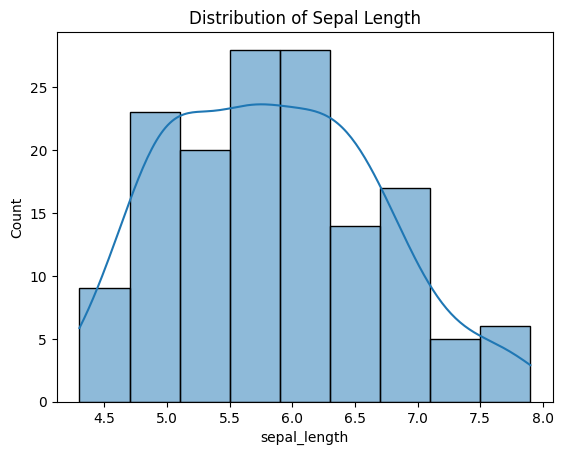

In [112]:
# Analyzing a Dataset's Distribution

# Load Dataset 
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Analyze sepal_length
feature = df["sepal_length"]
print("Skewness: ", skew(feature))
print("Kurtosis: ", kurtosis(feature))

# Visualize distribution
sns.histplot(feature, kde=True)
plt.title("Distribution of Sepal Length")
plt.show()

### Statistical Inference - Estimation and Confidence Interval
#### Introduction to Statistical Inference
- Process of making conclusions about a population based on sample data
- Population and sample. sample is a subset of population
- Goal: Estimate population parameters and assess the reliability of these estimates
#### Point Estimation and Interval Estimation
- Point Estimation: Single value estimate of a population parameter
- Interval Estimation: Provides a range of values within which the population parameter is likely to lie (Confidence interval)
- Confidence Interval (CI) = x \pm z * s / sqrt(n), x: sample mean, z: Z-score corresponding to the confidence level, s: std_dev, n: len of the data

#### Constructing CI
- For Means: When the population std_dev is unknown: CI = x \pm t * s/sqrt(n), Use the t-distribution for small samples
- For Proportions: CI = p \pm z * sqrt(p(1 - p)/n), p: sample proportion

In [114]:
# Sample data
data = [12,14,15,16,17,18,19]

# Calculate mean and std_dev
mean = np.mean(data)
std = np.std(data, ddof=1)

# 95% CI (using t-distribution)
n = len(data)
t_value = t.ppf(0.975, df=n-1)
margin_of_error = t_value * (std / np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
ci

(np.float64(13.627991424548375), np.float64(18.086294289737342))

In [117]:
# Conducting Sampling and Creating a Report
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

#Sampling
sample = df["sepal_length"].sample(30, random_state=42)

# Sample statistics
mean = sample.mean()
std = sample.std()
n = len(sample)

# Confidence Interval
z_value = norm.ppf(0.975)
margin_of_error = z_value * (std / np.sqrt(n))
ci = ((mean - margin_of_error, mean + margin_of_error))
print(mean)
print(ci)

5.98
(np.float64(5.677616880642557), np.float64(6.282383119357444))


### Hypothesis Testing and P-Values
#### Intro to Hypothesis Testing
- Statistical method to determine if there is enough evidence in a sample to infer a conclusion about the population
- Null Hypothesis (H_0): assumes that no effect or difference is created.
- Alternative Hypothesis (H_a): assumes an effect or difference exists.
- Steps
  - Formulate Null Hypothesis and Alternative Hypothesis
  - Choose a significance level (alpha) - common values are 0.05 or 0.01
  - Calculate the test statistics, either t statistics or z statistics
  - Determine the p-value
  - Compare the p-value to alpha: if p < alpha -> reject the NUll Hypothesis. otherwise fail to reject.

#### Understanding P_values and Significance Levels
- P-Value: The probability of observing results as extreme as the test statistic under Null Hypothesis
- smaller p-values indicate stronger evidence against Null Hypothesis
- Significance Level (alpha): threshold for deciding whether to reject a NUll Hypothesis
- Example: alpha=0.05 means a 5% risk of rejecting Null Hypothesis when it is true

#### Type of Errors
- Type | Erorr (alpha): Incorrectly rejecting Null Hypothesis when it is true. Example: Concluding a drug is effective when it is not.
- Type || Error (Beta): Failing to reject Null Hypothesis when it is false. Example: Concluding a drug is not effective when it is.

In [125]:
# Performing Hypothesis test (One sample T-Test)
# Sample data
data = [12,14,15,16,17,18,19]

# NUll Hypothesis: mean = 15
population_mean = 15

# Perform t-test
t_stat, p_value = ttest_1samp(data, population_mean)
print("T-Statistics: ", t_stat)
print("P-Value: ", p_value)

# Interpret Results
alpha = 0.05
if p_value <= alpha:
    print("Reject the Null Hypothesis: significance difference")
else:
    print("Fail to Reject the Null Hypothesis: no significant difference")

T-Statistics:  0.9408750722807707
P-Value:  0.383088241586687
Fail to Reject the Null Hypothesis: no significant difference


In [129]:
# Two Sample T-Test
# Data from two groups
group1 = [12,14,15,16,17,18,19]
group2 = [11,13,14,15,16,17,18]

# Performing t-test
t_stat, p_value = ttest_ind(group1, group2)
print("T-Statistics: ", t_stat)
print("P-Value: ", p_value)

# Interpret Results
alpha = 0.05
if p_value <= alpha:
    print("Reject the Null Hypothesis: significance difference")
else:
    print("Fail to Reject the Null Hypothesis: no significant difference")

T-Statistics:  0.7761823345023016
P-Value:  0.45266873983452593
Fail to Reject the Null Hypothesis: no significant difference


### Types of Hypotesis Tests
#### T-Tests
- Purpose: Test whether the means of one or more groups differ significantly
- **Types**
  - One-Sample T-Test: Tests if the mean of a sample differs from a known value or population mean
  - Two-Sample T-Test(Independent T-Test): Compares the means of two independent groups
  - Paired Sample T-Test: Compares means of two related groups(e.g., pre-test vs post-test)
- **Example Use Cases**
  - One sample: Testing if the average test score of a class differs from the national average
  - Two sample: Comparing test scores between two classes
  - Paired sample: Comparing weight before and after a diet program

In [137]:
# Paired T-Test
pre_test = [12,14,15,16,17]
post_test = [13,14,16,17,18]

t_stat, p_value = ttest_rel(pre_test, post_test)
print("Paired T-Test: ", t_stat, p_value)

Paired T-Test:  -3.9999999999999996 0.016130089900092532


#### Chi-Square Test
- Purpose: Test for independence or goodness-of-fit in categorical data
- Chi-Square Test of Independence: Tests if two categorical variables are independent
- **Example Use Case:** Testing if gender is independent of preference for a product
- **Steps**
  - Create a contingency table
  - Calculate expected frequencies
  - Compute X**2 statistic and p-value

In [138]:
# Contingency Table
data =[[50,30, 20], [30,40, 30]]

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(data)
print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic:  8.428571428571429
P-Value:  0.014782877194839422
Expected Frequencies:
 [[40. 35. 25.]
 [40. 35. 25.]]


### ANOVA (Analysis of Variance)
- Purpose: Compare the means of three or more groups
- **Hypotheses**
  - Null: All group means are equal
  - Alternative: At least one group mean is different
- **Example Use Case:** Testing if the mean scores of students from three different schools differ

In [134]:
# Data from three groups
group1 = [12,14,15,16,17]
group2 = [11,13,14,15,16]
group3 = [10,12,13,14,15]

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)
print("F-Statistic: ", f_stat)
print("P-Value: ", p_value)

F-Statistic:  1.3513513513513515
P-Value:  0.29559999508292545
